In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [2]:
def apply_pca(csv_path, n_components=2):
    """
    Apply PCA to the numeric columns of a CSV file.

    Parameters:
    -----------
    csv_path: str
        The path to the CSV file.

    n_components: int
        The number of principal components to compute. Default is 2.

    Returns:
    --------
    pca_results: numpy.ndarray
        The transformed data in the new coordinate system defined by the principal components.

    explained_variance_ratio: numpy.ndarray
        Percentage of variance explained by each of the selected components.
    """
    
    # Load the CSV data
    data_df = pd.read_csv(csv_path)

    # Select numeric columns only
    numeric_data_df = data_df.select_dtypes(include=np.number)

    # Standardize the numeric data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(numeric_data_df)

    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_results = pca.fit_transform(standardized_data)

    return pca_results, pca.explained_variance_ratio_


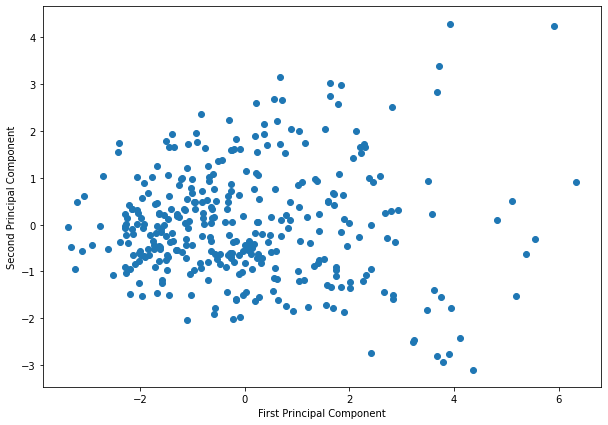

Principal Component 1: 41.54% of the variance
Principal Component 2: 18.20% of the variance


In [3]:
import matplotlib.pyplot as plt

def apply_and_plot_pca(csv_path, n_components=2):
    """
    Apply PCA to the numeric columns of a CSV file and plot the results.

    Parameters:
    -----------
    csv_path: str
        The path to the CSV file.

    n_components: int
        The number of principal components to compute. Default is 2.
    """
    
    # Apply PCA
    pca_results, explained_variance_ratio = apply_pca(csv_path, n_components)

    # Create a plot
    plt.figure(figsize=(10, 7))

    # If we have 2 or more components, make a scatter plot of the first two components
    if n_components >= 2:
        plt.scatter(pca_results[:, 0], pca_results[:, 1])
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')

    # If we have only one component, make a line plot
    elif n_components == 1:
        plt.plot(pca_results)
        plt.xlabel('Index')
        plt.ylabel('First Principal Component')

    # Show the plot
    plt.show()

    # Print the explained variance
    for i, explained_var in enumerate(explained_variance_ratio):
        print(f'Principal Component {i + 1}: {explained_var * 100:.2f}% of the variance')

path = '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Antanas_Control_s_10_e_2_d_3/filtered_cell_statistics.csv'
apply_and_plot_pca(path, 2)

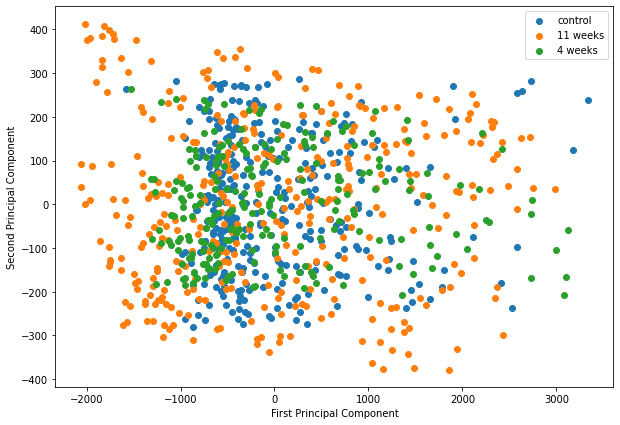

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

def apply_and_plot_pca(csv_files_dict, n_components=2):
    """
    Apply PCA to multiple CSV files and plot the results with different colors.

    Parameters:
    -----------
    csv_files_dict: dict
        A dictionary where the keys are labels for the data sets and the values are the paths to the CSV files.

    n_components: int, optional
        The number of principal components to keep.

    Returns:
    --------
    pca_results_dict: dict
        A dictionary where the keys are the labels and the values are the PCA results (numpy arrays).
    """

    pca = PCA(n_components=n_components)

    # Create a plot
    plt.figure(figsize=(10, 7))

    pca_results_dict = {}
    for label, csv_file in csv_files_dict.items():
        # Load the data from the CSV file
        data_df = pd.read_csv(csv_file)

        # Get the numeric columns
        numeric_columns = data_df.select_dtypes(include=[np.number])

        # Apply PCA
        pca_results = pca.fit_transform(numeric_columns)

        # Add the PCA results to the dictionary
        pca_results_dict[label] = pca_results

        # Plot the PCA results
        if pca_results.shape[1] >= 2:
            plt.scatter(pca_results[:, 0], pca_results[:, 1], label=label)

    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend()
    plt.show()

    return pca_results_dict


# Define a dictionary of CSV files
csv_files_dict = {
    'control': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_Control_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '11 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_11w_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '4 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_4w_s_10_e_2_d_3/filtered_cell_statistics.csv'
}

# Apply PCA and plot the results
pca_results_dict = apply_and_plot_pca(csv_files_dict, n_components=2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Explained variance ratio for control: [0.95851585 0.03649274 0.00456127]
Explained variance ratio for 11 weeks: [0.97411029 0.02285446 0.00269373]
Explained variance ratio for 4 weeks: [0.98271786 0.01361289 0.00291609]


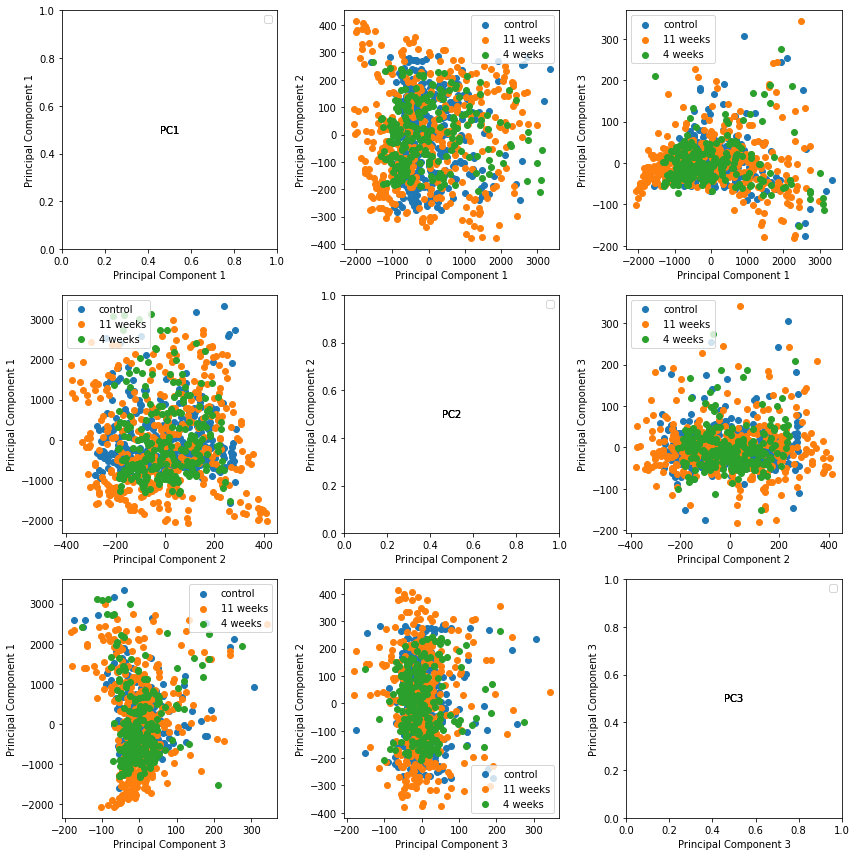

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

def apply_and_plot_pca(csv_files_dict, n_components=3):
    """
    Apply PCA to multiple CSV files and plot pairwise plots of the results with different colors.

    Parameters:
    -----------
    csv_files_dict: dict
        A dictionary where the keys are labels for the data sets and the values are the paths to the CSV files.

    n_components: int, optional
        The number of principal components to keep.

    Returns:
    --------
    pca_results_dict: dict
        A dictionary where the keys are the labels and the values are the PCA results (numpy arrays).
    """

    pca = PCA(n_components=n_components)

    pca_results_dict = {}
    for label, csv_file in csv_files_dict.items():
        # Load the data from the CSV file
        data_df = pd.read_csv(csv_file)

        # Get the numeric columns
        numeric_columns = data_df.select_dtypes(include=[np.number])

        # Apply PCA
        pca_results = pca.fit_transform(numeric_columns)

        # Add the PCA results to the dictionary
        pca_results_dict[label] = pca_results

        # Print explained variance
        print(f"Explained variance ratio for {label}: {pca.explained_variance_ratio_}")

    # Create pairwise plots
    fig, axs = plt.subplots(n_components, n_components, figsize=(4*n_components, 4*n_components))

    for i in range(n_components):
        for j in range(n_components):
            for label, pca_results in pca_results_dict.items():
                if i != j:
                    axs[i, j].scatter(pca_results[:, i], pca_results[:, j], label=label)
                else:
                    axs[i, j].text(0.5, 0.5, f"PC{i+1}", ha="center", va="center")
                axs[i, j].set_xlabel(f'Principal Component {i+1}')
                axs[i, j].set_ylabel(f'Principal Component {j+1}')
                axs[i, j].legend()

    plt.tight_layout()
    plt.show()

    return pca_results_dict


# Define a dictionary of CSV files
csv_files_dict = {
    'control': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_Control_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '11 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_11w_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '4 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_4w_s_10_e_2_d_3/filtered_cell_statistics.csv'
}
pca_results_dict = apply_and_plot_pca(csv_files_dict, n_components=3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Explained variance ratio: [0.97119415 0.0250835 ]


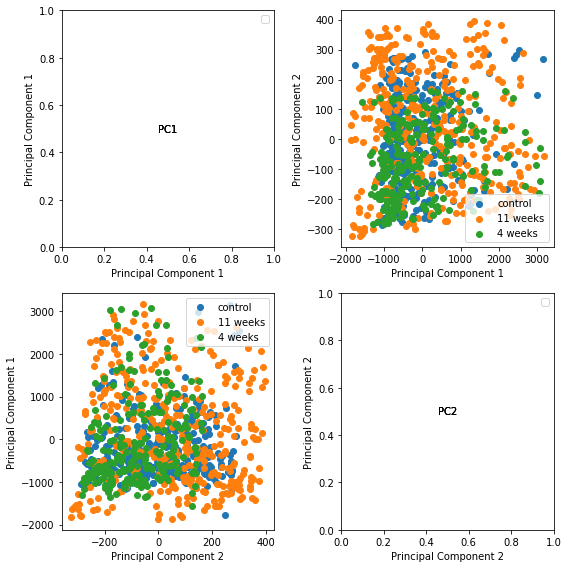

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

def apply_and_plot_pca(csv_files_dict, n_components=3):
    """
    Apply PCA to multiple CSV files, concatenate the data, and plot pairwise plots of the results with different colors.

    Parameters:
    -----------
    csv_files_dict: dict
        A dictionary where the keys are labels for the data sets and the values are the paths to the CSV files.

    n_components: int, optional
        The number of principal components to keep.

    Returns:
    --------
    pca_results_dict: dict
        A dictionary where the keys are the labels and the values are the PCA results (numpy arrays).
    """
    
    concatenated_data = []
    label_index_ranges = {}

    for label, csv_file in csv_files_dict.items():
        # Load the data from the CSV file
        data_df = pd.read_csv(csv_file)

        # Get the numeric columns
        numeric_columns = data_df.select_dtypes(include=[np.number])
        
        start_index = len(concatenated_data)
        concatenated_data.extend(numeric_columns.values)
        end_index = len(concatenated_data)

        # Save the start and end indices for each label
        label_index_ranges[label] = (start_index, end_index)

    # Convert the list to a numpy array
    concatenated_data = np.array(concatenated_data)

    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_results = pca.fit_transform(concatenated_data)

    # Print explained variance
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

    # Create pairwise plots
    fig, axs = plt.subplots(n_components, n_components, figsize=(4*n_components, 4*n_components))

    for i in range(n_components):
        for j in range(n_components):
            for label, (start_index, end_index) in label_index_ranges.items():
                if i != j:
                    axs[i, j].scatter(pca_results[start_index:end_index, i], pca_results[start_index:end_index, j], label=label)
                else:
                    axs[i, j].text(0.5, 0.5, f"PC{i+1}", ha="center", va="center")
                axs[i, j].set_xlabel(f'Principal Component {i+1}')
                axs[i, j].set_ylabel(f'Principal Component {j+1}')
                axs[i, j].legend()

    plt.tight_layout()
    plt.show()

    return pca_results


csv_files_dict = {
    'control': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_Control_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '11 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_11w_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '4 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_4w_s_10_e_2_d_3/filtered_cell_statistics.csv'
}
pca_results_dict = apply_and_plot_pca(csv_files_dict, n_components=2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

     cell_id    cell_area  cell_volume  cell_isoperimetric_ratio  \
0         31  1086.617520  2055.977055                303.524381   
1         34   593.360103   938.110863                237.381405   
2         36   783.210900  1428.847045                235.323168   
3         38   922.351125  1984.205629                199.303759   
4         44  1753.049993  4128.660090                316.056441   
..       ...          ...          ...                       ...   
322      587   643.931195  1163.638481                197.188800   
323      588   703.663516  1224.766584                232.267500   
324      589   653.424930  1273.637545                171.986910   
325      590   955.519821  2017.158901                214.406960   
326      598   459.781482   792.590112                154.723802   

     cell_nb_of_neighbors  cell_elongation  cell_contact_area_fraction  \
0                      12         1.944479                    1.269156   
1                      12         1

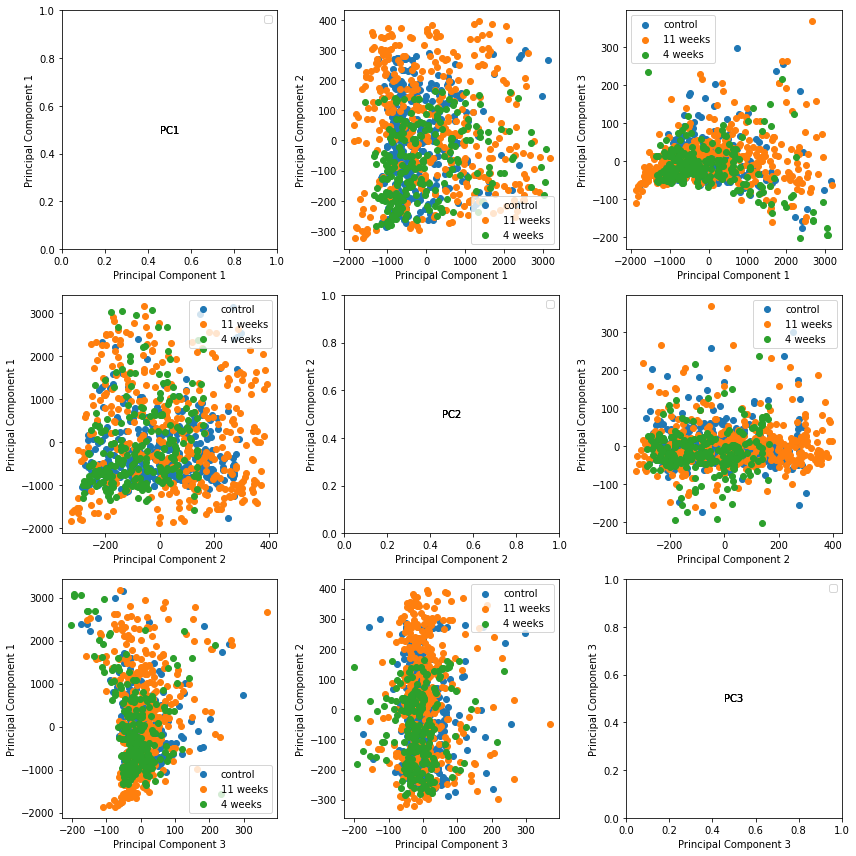

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

def apply_and_plot_pca(csv_files_dict, n_components=3):
    """
    Apply PCA to multiple CSV files, concatenate the data, and plot pairwise plots of the results with different colors.

    Parameters:
    -----------
    csv_files_dict: dict
        A dictionary where the keys are labels for the data sets and the values are the paths to the CSV files.

    n_components: int, optional
        The number of principal components to keep.

    Returns:
    --------
    pca_results_dict: dict
        A dictionary where the keys are the labels and the values are the PCA results (numpy arrays).
    """
    
    concatenated_data = []
    label_index_ranges = {}

    for label, csv_file in csv_files_dict.items():
        # Load the data from the CSV file
        data_df = pd.read_csv(csv_file)

        # Get the numeric columns
        numeric_columns = data_df.select_dtypes(include=[np.number])
        print(numeric_columns)
        start_index = len(concatenated_data)
        concatenated_data.extend(numeric_columns.values)
        end_index = len(concatenated_data)

        # Save the start and end indices for each label
        label_index_ranges[label] = (start_index, end_index)

    # Convert the list to a numpy array
    concatenated_data = np.array(concatenated_data)

    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_results = pca.fit_transform(concatenated_data)

    # Print explained variance
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

    # Print loadings (components)
    print(f"PCA loadings: \n{pca.components_}")

    # Create pairwise plots
    fig, axs = plt.subplots(n_components, n_components, figsize=(4*n_components, 4*n_components))

    for i in range(n_components):
        for j in range(n_components):
            for label, (start_index, end_index) in label_index_ranges.items():
                if i != j:
                    axs[i, j].scatter(pca_results[start_index:end_index, i], pca_results[start_index:end_index, j], label=label)
                else:
                    axs[i, j].text(0.5, 0.5, f"PC{i+1}", ha="center", va="center")
                axs[i, j].set_xlabel(f'Principal Component {i+1}')
                axs[i, j].set_ylabel(f'Principal Component {j+1}')
                axs[i, j].legend()

    plt.tight_layout()
    plt.show()

    return pca_results


csv_files_dict = {
    'control': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_Control_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '11 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_11w_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '4 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_4w_s_10_e_2_d_3/filtered_cell_statistics.csv'
}

pca_results_dict = apply_and_plot_pca(csv_files_dict, n_components=3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Explained variance ratio: [0.97119415 0.0250835  0.00324416]
PCA loadings: 
[[-1.89746357e-02  3.09933422e-01  9.50268215e-01  1.38942412e-02
   2.05850405e-03  5.18652080e-05  5.49157025e-05  1.93459072e-02]
 [ 9.99566890e-01  2.24973599e-02  1.26499597e-02  1.05498767e-02
   2.01545363e-03 -1.41664201e-05  2.86498180e-05 -9.19331169e-03]
 [-2.01525650e-02  8.20156320e-01 -2.75522791e-01  5.00719072e-01
   1.06081278e-02  2.13097169e-03  2.00812228e-04  1.37103128e-02]]


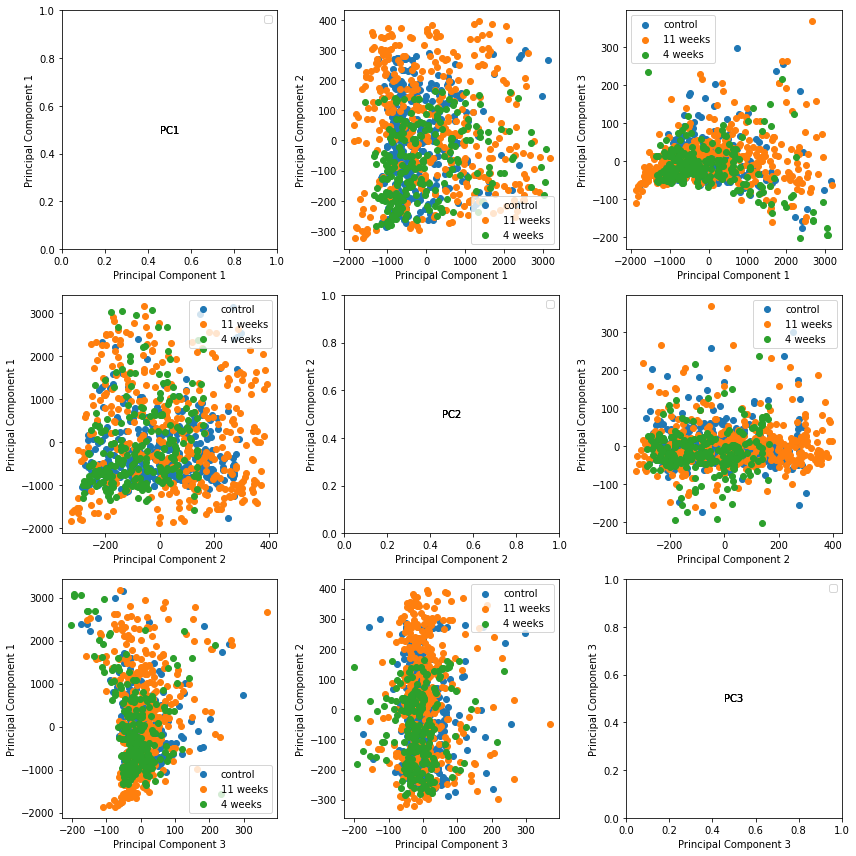

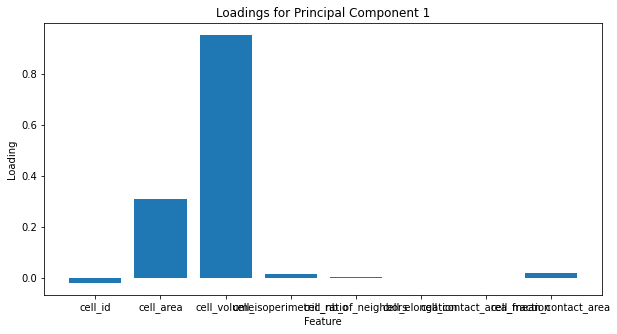

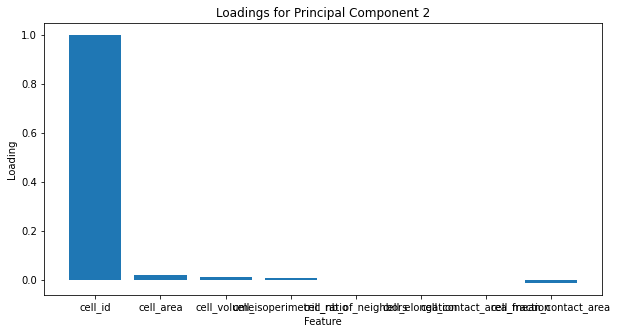

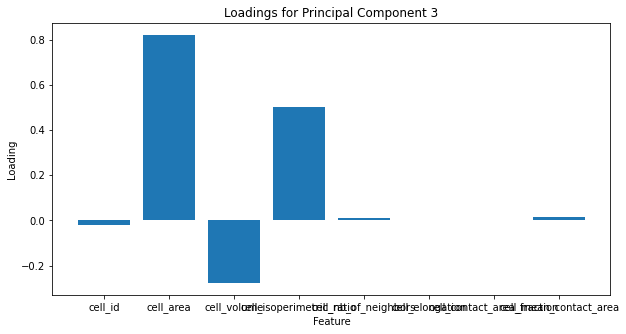

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def apply_and_plot_pca(csv_files_dict, n_components=3):
    """
    Apply PCA to multiple CSV files, concatenate the data, and plot pairwise plots of the results with different colors.

    Parameters:
    -----------
    csv_files_dict: dict
        A dictionary where the keys are labels for the data sets and the values are the paths to the CSV files.

    n_components: int, optional
        The number of principal components to keep.

    Returns:
    --------
    pca_results_dict: dict
        A dictionary where the keys are the labels and the values are the PCA results (numpy arrays).
    """
    
    concatenated_data = []
    label_index_ranges = {}
    feature_names = None

    for label, csv_file in csv_files_dict.items():
        # Load the data from the CSV file
        data_df = pd.read_csv(csv_file)

        # Get the numeric columns
        numeric_columns = data_df.select_dtypes(include=[np.number])
        
        start_index = len(concatenated_data)
        concatenated_data.extend(numeric_columns.values)
        end_index = len(concatenated_data)

        # Save the feature names
        if feature_names is None:
            feature_names = numeric_columns.columns.tolist()

        # Save the start and end indices for each label
        label_index_ranges[label] = (start_index, end_index)

    # Convert the list to a numpy array
    concatenated_data = np.array(concatenated_data)

    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_results = pca.fit_transform(concatenated_data)

    # Print explained variance
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

    # Print loadings (components)
    print(f"PCA loadings: \n{pca.components_}")

    # Create pairwise plots
    fig, axs = plt.subplots(n_components, n_components, figsize=(4*n_components, 4*n_components))

    for i in range(n_components):
        for j in range(n_components):
            for label, (start_index, end_index) in label_index_ranges.items():
                if i != j:
                    axs[i, j].scatter(pca_results[start_index:end_index, i], pca_results[start_index:end_index, j], label=label)
                else:
                    axs[i, j].text(0.5, 0.5, f"PC{i+1}", ha="center", va="center")
                axs[i, j].set_xlabel(f'Principal Component {i+1}')
                axs[i, j].set_ylabel(f'Principal Component {j+1}')
                axs[i, j].legend()

    plt.tight_layout()
    plt.show()

    # Plot loadings
    for i in range(n_components):
        plt.figure(figsize=(10, 5))
        loadings = pca.components_[i]
        plt.bar(feature_names, loadings)
        plt.title(f"Loadings for Principal Component {i+1}")
        plt.xlabel("Feature")
        plt.ylabel("Loading")
        plt.show()

    return pca_results

csv_files_dict = {
    'control': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_Control_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '11 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_11w_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '4 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_4w_s_10_e_2_d_3/filtered_cell_statistics.csv'
}

pca_results_dict = apply_and_plot_pca(csv_files_dict, n_components=3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Explained variance ratio: [0.54653717 0.19194575]
PCA loadings: 
[[ 0.49030889  0.46979603  0.31437127  0.38587056  0.24961392  0.26984078
   0.39502195]
 [-0.06302921 -0.15247862  0.57256579 -0.20674444  0.63968036 -0.42601715
  -0.10733665]]


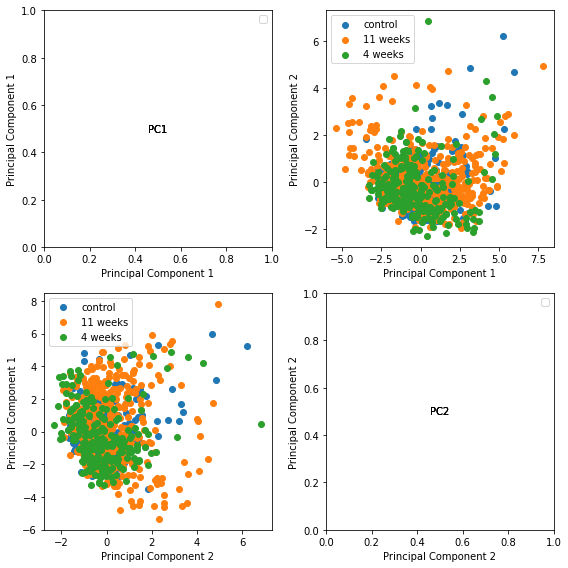

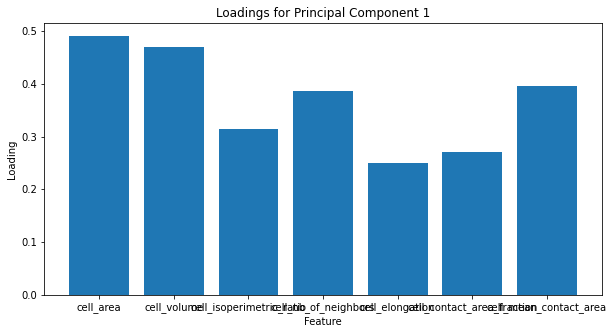

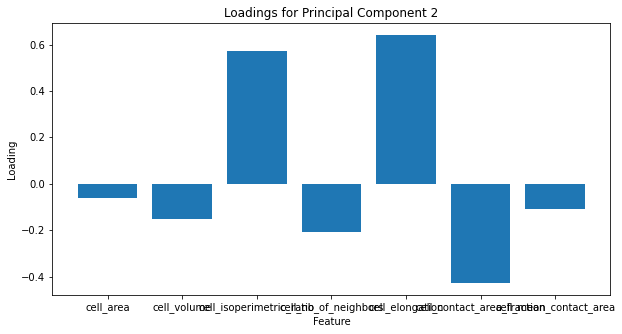

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def apply_and_plot_pca(csv_files_dict, n_components=3):
    """
    Apply PCA to multiple CSV files, concatenate the data, and plot pairwise plots of the results with different colors.

    Parameters:
    -----------
    csv_files_dict: dict
        A dictionary where the keys are labels for the data sets and the values are the paths to the CSV files.

    n_components: int, optional
        The number of principal components to keep.

    Returns:
    --------
    pca_results_dict: dict
        A dictionary where the keys are the labels and the values are the PCA results (numpy arrays).
    """

    concatenated_data = []
    label_index_ranges = {}
    feature_names = None

    for label, csv_file in csv_files_dict.items():
        # Load the data from the CSV file
        data_df = pd.read_csv(csv_file)

        # Get the numeric columns
        numeric_columns = data_df.select_dtypes(include=[np.number])
        numeric_columns = numeric_columns.drop('cell_id', axis=1)

        start_index = len(concatenated_data)
        concatenated_data.extend(numeric_columns.values)
        end_index = len(concatenated_data)

        # Save the feature names
        if feature_names is None:
            feature_names = numeric_columns.columns.tolist()

        # Save the start and end indices for each label
        label_index_ranges[label] = (start_index, end_index)

    # Convert the list to a numpy array
    concatenated_data = np.array(concatenated_data)

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(concatenated_data)

    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_results = pca.fit_transform(scaled_data)

    # Print explained variance
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

    # Print loadings (components)
    print(f"PCA loadings: \n{pca.components_}")

    # Create pairwise plots
    fig, axs = plt.subplots(n_components, n_components, figsize=(4*n_components, 4*n_components))

    for i in range(n_components):
        for j in range(n_components):
            for label, (start_index, end_index) in label_index_ranges.items():
                if i != j:
                    axs[i, j].scatter(pca_results[start_index:end_index, i], pca_results[start_index:end_index, j], label=label)
                else:
                    axs[i, j].text(0.5, 0.5, f"PC{i+1}", ha="center", va="center")
                axs[i, j].set_xlabel(f'Principal Component {i+1}')
                axs[i, j].set_ylabel(f'Principal Component {j+1}')
                axs[i, j].legend()

    plt.tight_layout()
    plt.show()

    # Plot loadings
    for i in range(n_components):
        plt.figure(figsize=(10, 5))
        loadings = pca.components_[i]
        plt.bar(feature_names, loadings)
        plt.title(f"Loadings for Principal Component {i+1}")
        plt.xlabel("Feature")
        plt.ylabel("Loading")
        plt.show()

    return pca_results

csv_files_dict = {
    'control': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_Control_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '11 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_11w_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '4 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_4w_s_10_e_2_d_3/filtered_cell_statistics.csv'
}

pca_results_dict = apply_and_plot_pca(csv_files_dict, n_components=2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Explained variance ratio: [0.54653717 0.19194575]
PCA loadings: 
[[ 0.49030889  0.46979603  0.31437127  0.38587056  0.24961392  0.26984078
   0.39502195]
 [-0.06302921 -0.15247862  0.57256579 -0.20674444  0.63968036 -0.42601715
  -0.10733665]]


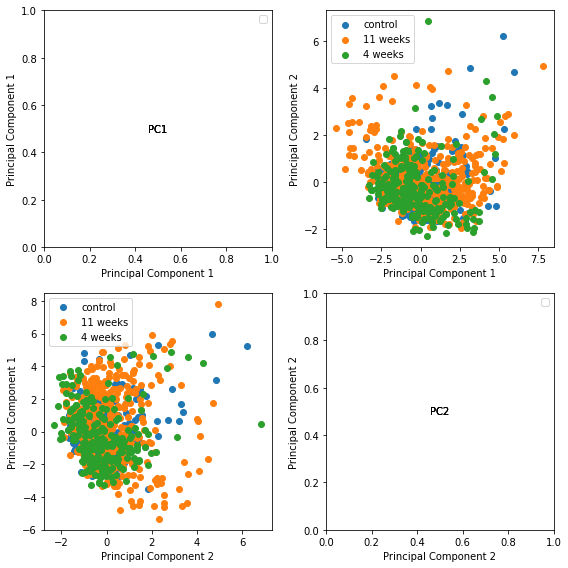

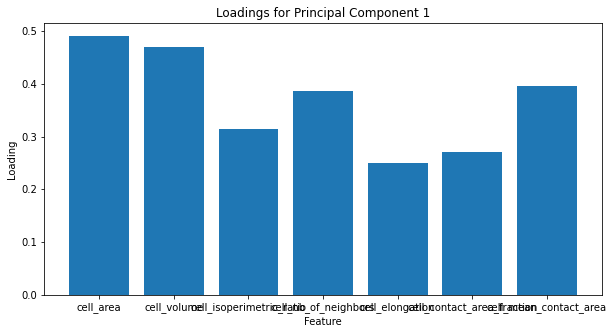

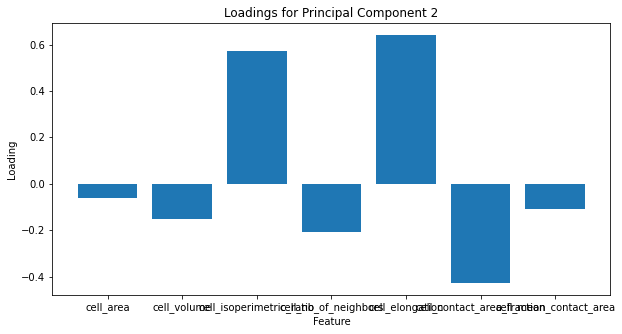

In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_and_plot_pca_seaborn(csv_files_dict, n_components=3):
    """
    Apply PCA to multiple CSV files, concatenate the data, and plot pairwise plots of the results with different colors.

    Parameters:
    -----------
    csv_files_dict: dict
        A dictionary where the keys are labels for the data sets and the values are the paths to the CSV files.

    n_components: int, optional
        The number of principal components to keep.

    Returns:
    --------
    pca_results_df: DataFrame
        A DataFrame where the rows correspond to samples and the columns to the PCA results.
    """

    concatenated_data = []
    labels = []
    feature_names = None

    for label, csv_file in csv_files_dict.items():
        # Load the data from the CSV file
        data_df = pd.read_csv(csv_file)

        # Get the numeric columns
        numeric_columns = data_df.select_dtypes(include=[np.number])
        numeric_columns = numeric_columns.drop('cell_id', axis=1)

        concatenated_data.extend(numeric_columns.values)
        labels.extend([label]*len(numeric_columns))

        # Save the feature names
        if feature_names is None:
            feature_names = numeric_columns.columns.tolist()

    # Convert the list to a numpy array
    concatenated_data = np.array(concatenated_data)

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(concatenated_data)

    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_results = pca.fit_transform(scaled_data)

    # Print explained variance
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

    # Print loadings (components)
    print(f"PCA loadings: \n{pca.components_}")

    # Convert PCA results to a DataFrame and add labels
    pca_results_df = pd.DataFrame(pca_results, columns=[f"PC{i+1}" for i in range(n_components)])
    pca_results_df['Label'] = labels

    # Create pairwise plots with Seaborn
    sns.pairplot(pca_results_df, hue="Label", diag_kind="hist")

    # Plot loadings
    for i in range(n_components):
        plt.figure(figsize=(10, 5))
        loadings = pca.components_[i]
        sns.barplot(x=feature_names, y=loadings)
        plt.title(f"Loadings for Principal Component {i+1}")
        plt.xlabel("Feature")
        plt.ylabel("Loading")
        plt.show()

    return pca_results_df

csv_files_dict = {
    'control': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_Control_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '11 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_11w_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '4 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_4w_s_10_e_2_d_3/filtered_cell_statistics.csv'
}

pca_results_dict = apply_and_plot_pca(csv_files_dict, n_components=2)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 923 samples in 0.000s...
[t-SNE] Computed neighbors for 923 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 923 / 923
[t-SNE] Mean sigma: 0.396279
[t-SNE] KL divergence after 250 iterations with early exaggeration: 416.760529
[t-SNE] KL divergence after 2000 iterations: 1.043822


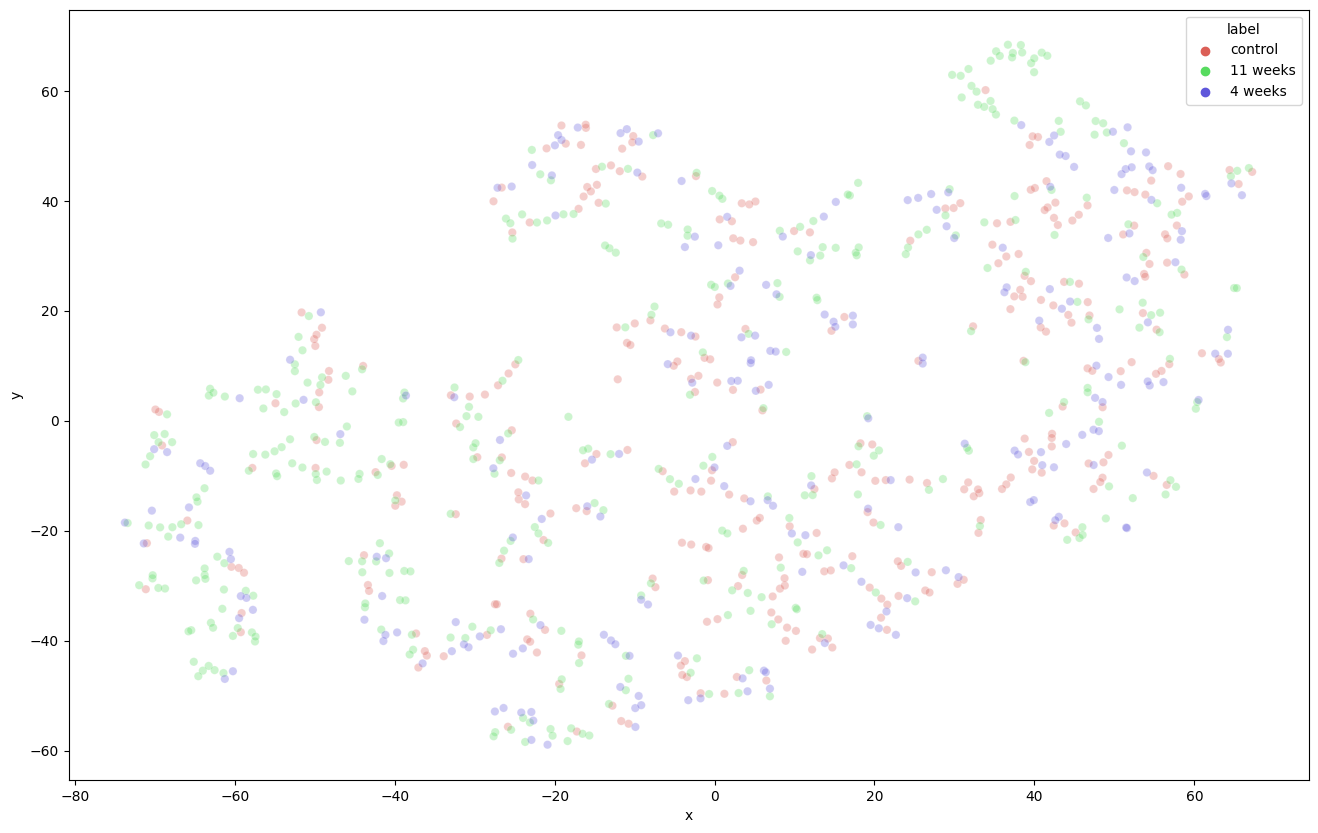

In [57]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def apply_and_plot_tsne(csv_files_dict):
    """
    Apply t-SNE to multiple CSV files, concatenate the data, and plot the results with different colors.

    Parameters:
    -----------
    csv_files_dict: dict
        A dictionary where the keys are labels for the data sets and the values are the paths to the CSV files.

    Returns:
    --------
    tsne_results_dict: dict
        A dictionary where the keys are the labels and the values are the t-SNE results (numpy arrays).
    """

    concatenated_data = []
    label_index_ranges = {}
    feature_names = None
    labels = []

    for label, csv_file in csv_files_dict.items():
        # Load the data from the CSV file
        data_df = pd.read_csv(csv_file)

        # Get the numeric columns
        numeric_columns = data_df.select_dtypes(include=[np.number])
        numeric_columns = numeric_columns.drop('cell_id', axis=1)

        start_index = len(concatenated_data)
        concatenated_data.extend(numeric_columns.values)
        end_index = len(concatenated_data)

        # Save the feature names
        if feature_names is None:
            feature_names = numeric_columns.columns.tolist()

        # Save the start and end indices for each label
        label_index_ranges[label] = (start_index, end_index)

        # Add labels for each row
        labels.extend([label] * numeric_columns.shape[0])

    # Convert the list to a numpy array
    concatenated_data = np.array(concatenated_data)

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(concatenated_data)

    # Apply t-SNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=10, early_exaggeration=50, n_iter=2000, init = 'pca')
    tsne_results = tsne.fit_transform(scaled_data)

    # Create DataFrame for seaborn plot
    df_tsne = pd.DataFrame(tsne_results, columns=['x', 'y'])
    df_tsne['label'] = labels

    # Plot t-SNE results with seaborn
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        palette=sns.color_palette("hls", len(csv_files_dict)),
        data=df_tsne,
        legend="full",
        alpha=0.3
    )

    return tsne_results

csv_files_dict = {
    'control': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_Control_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '11 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_11w_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '4 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_4w_s_10_e_2_d_3/filtered_cell_statistics.csv'
}

pca_results_dict = apply_and_plot_tsne(csv_files_dict)

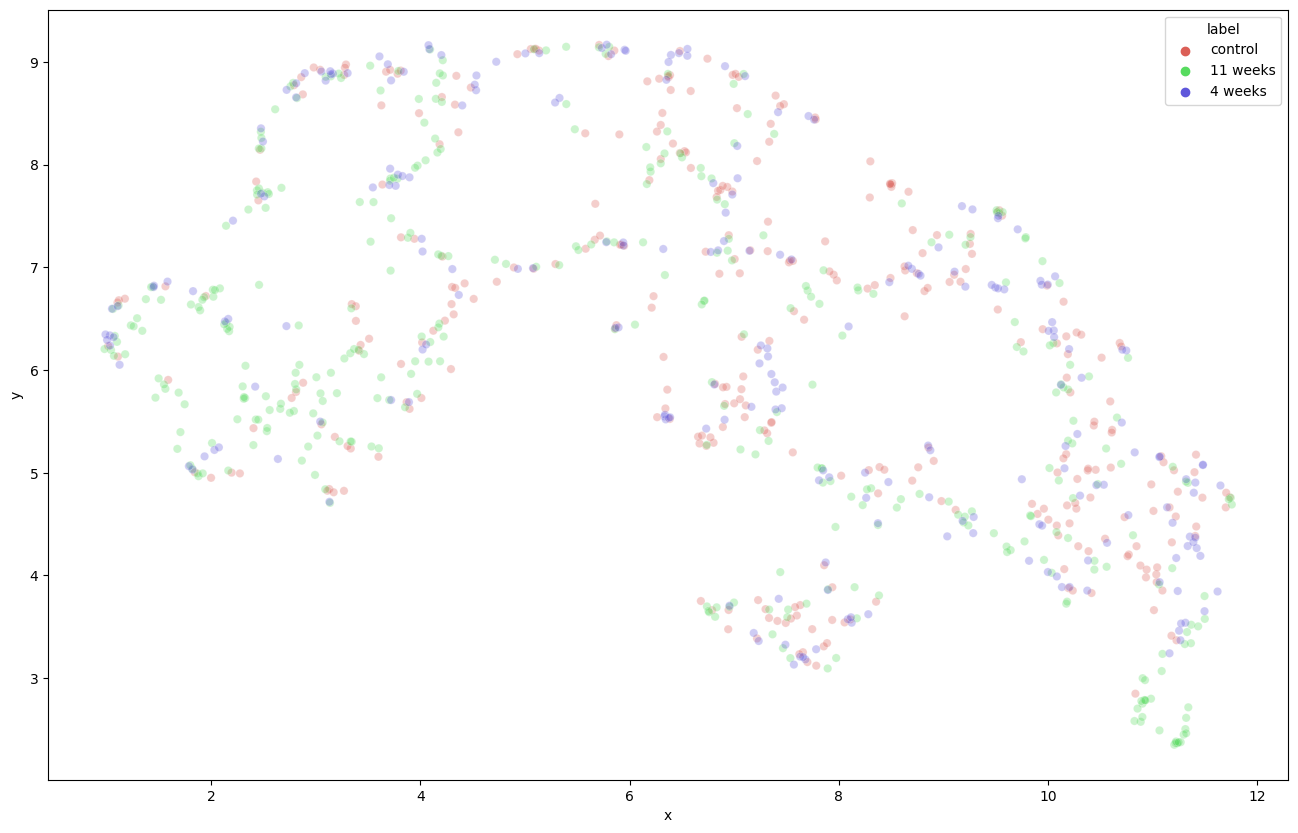

In [47]:
import umap 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_and_plot_umap(csv_files_dict):
    """
    Apply UMAP to multiple CSV files, concatenate the data, and plot the results with different colors.

    Parameters:
    -----------
    csv_files_dict: dict
        A dictionary where the keys are labels for the data sets and the values are the paths to the CSV files.

    Returns:
    --------
    umap_results_dict: dict
        A dictionary where the keys are the labels and the values are the UMAP results (numpy arrays).
    """

    concatenated_data = []
    label_index_ranges = {}
    feature_names = None
    labels = []

    for label, csv_file in csv_files_dict.items():
        # Load the data from the CSV file
        data_df = pd.read_csv(csv_file)

        # Get the numeric columns
        numeric_columns = data_df.select_dtypes(include=[np.number])
        numeric_columns = numeric_columns.drop('cell_id', axis=1)

        start_index = len(concatenated_data)
        concatenated_data.extend(numeric_columns.values)
        end_index = len(concatenated_data)

        # Save the feature names
        if feature_names is None:
            feature_names = numeric_columns.columns.tolist()

        # Save the start and end indices for each label
        label_index_ranges[label] = (start_index, end_index)

        # Add labels for each row
        labels.extend([label] * numeric_columns.shape[0])

    # Convert the list to a numpy array
    concatenated_data = np.array(concatenated_data)

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(concatenated_data)

    # Apply UMAP
    reducer = umap.UMAP(n_neighbors=10, repulsion_strength=0.9, min_dist=0.1, spread = 1)
    umap_results = reducer.fit_transform(scaled_data)

    # Create DataFrame for seaborn plot
    df_umap = pd.DataFrame(umap_results, columns=['x', 'y'])
    df_umap['label'] = labels

    # Plot UMAP results with seaborn
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        palette=sns.color_palette("hls", len(csv_files_dict)),
        data=df_umap,
        legend="full",
        alpha=0.3
    )

    return umap_results

csv_files_dict = {
    'control': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_Control_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '11 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_11w_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '4 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_4w_s_10_e_2_d_3/filtered_cell_statistics.csv'
}

pca_results_dict = apply_and_plot_umap(csv_files_dict)

May 25 03:30:20 PM: Computing 10-nearest neighbors, with max_distance=None
May 25 03:30:20 PM: Exact nearest neighbors by brute force 


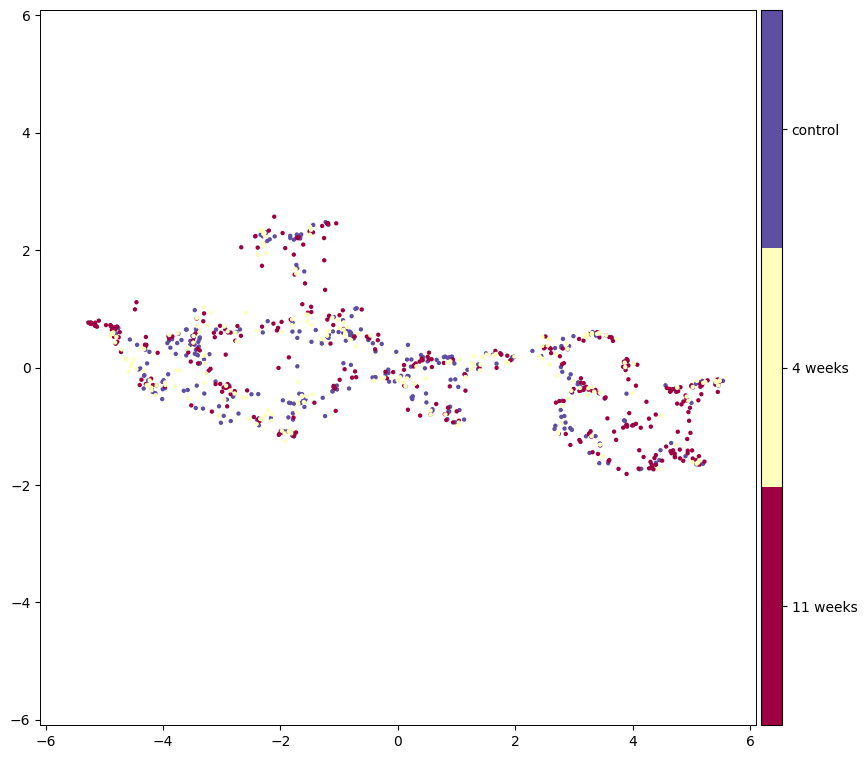

In [40]:
import pymde
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def apply_and_plot_pymde(csv_files_dict):
    """
    Apply MDE to multiple pandas DataFrames, concatenate the data, and plot the results with different colors.

    Parameters:
    -----------
    data_dict: dict
        A dictionary where the keys are labels for the data sets and the values are pandas dataframes.

    Returns:
    --------
    mde_results_dict: dict
        A dictionary where the keys are the labels and the values are the MDE results (numpy arrays).
    """

    concatenated_data = []
    label_index_ranges = {}
    feature_names = None
    labels = []

    for label, csv_file in csv_files_dict.items():
        # Load the data from the CSV file
        data_df = pd.read_csv(csv_file)

        # Get the numeric columns
        numeric_columns = data_df.select_dtypes(include=[np.number])
        numeric_columns = numeric_columns.drop('cell_id', axis=1)

        start_index = len(concatenated_data)
        concatenated_data.extend(numeric_columns.values)
        end_index = len(concatenated_data)

        # Save the feature names
        if feature_names is None:
            feature_names = numeric_columns.columns.tolist()

        # Save the start and end indices for each label
        label_index_ranges[label] = (start_index, end_index)

        # Add labels for each row
        labels.extend([label] * numeric_columns.shape[0])

    # Convert the list to a numpy array
    concatenated_data = np.array(concatenated_data)

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(concatenated_data)

    # Apply MDE
    embedding = pymde.preserve_neighbors(scaled_data, n_neighbors = 10, embedding_dim=2, verbose=True, init = 'random', repulsive_penalty = pymde.penalties.InvPower).embed()
    #embedding = pymde.preserve_distances(scaled_data).embed()

    # Plot MDE results
    pymde.plot(embedding, color_by=labels, marker_size=10)

    return embedding
csv_files_dict = {
    'control': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_Control_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '11 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_11w_s_10_e_2_d_3/filtered_cell_statistics.csv',
    '4 weeks': '/Users/antanas/BC_Project/No_Edge_5000/No_edge/Validated_labels_Franzi_4w_s_10_e_2_d_3/filtered_cell_statistics.csv'
}

pca_results_dict = apply_and_plot_pymde(csv_files_dict)